In [1]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [2]:
dfoscar = pd.read_csv('data/entities_dataframe.tsv', sep='\t')
dfoscar.head()

,name,standardInChI,standardInChIKey,doi,ExactMolWt,pubchem
0,EtOAc,"InChI=1S/C4H8O2/c1-3-6-4(2)5/h3H2,1-2H3",XEKOWRVHYACXOJ-UHFFFAOYSA-N,np50112a006,88.052429,8857.0
1,hydroxyl,InChI=1S/HO/h1H,TUJKJAMUKRIRHC-UHFFFAOYSA-N,np50112a006,17.002740,157350.0
2,3-nitrobenzyl alcohol,InChI=1S/C7H7NO3/c9-5-6-2-1-3-7(4-6)8(10)11/h1...,CWNPOQFCIIFQDM-UHFFFAOYSA-N,np50112a006,153.042593,69267.0
3,peroxide,InChI=1S/O2/c1-2/q-2,ANAIPYUSIMHBEL-UHFFFAOYSA-N,np50112a006,31.990926,14774.0
4,hexane,"InChI=1S/C6H14/c1-3-5-6-4-2/h3-6H2,1-2H3",VLKZOEOYAKHREP-UHFFFAOYSA-N,np50112a006,86.109550,8058.0


In [3]:
dfoscar.shape

(272278, 6)

In [4]:
# Number of unique compounds
len(dfoscar['standardInChIKey'].unique())

20247

In [5]:
# Number of structures by paper
dfoscar['doi'].value_counts()

np50008a001             375
np020375t               220
np300468h               203
np50003a001             203
np300753z               189
                       ... 
acs.jnatprod.7b00710      1
np50028a023               1
acs.jnatprod.6b00816      1
np068226o                 1
np990054q                 1
Name: doi, Length: 12026, dtype: int64

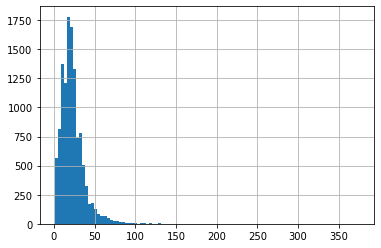

In [9]:
dfoscar['doi'].value_counts().hist(bins=100)

In [13]:
# Number of occurencies of each compound
dfoscar['standardInChIKey'].value_counts()

OKKJLVBELUTLKV-UHFFFAOYSA-N    12446
XLYOFNOQVPJJNP-UHFFFAOYSA-N    10399
OKTJSMMVPCPJKN-UHFFFAOYSA-N     8655
XEKOWRVHYACXOJ-UHFFFAOYSA-N     7192
WCYWZMWISLQXQU-UHFFFAOYSA-N     6721
                               ...  
CGCWGHILDIXRMP-UHFFFAOYSA-N        1
RILPIWOPNGRASR-CRCLSJGQSA-N        1
ZVJLZUWCAUTTBS-AATRIKPKSA-N        1
DCTCPVNZISLMSS-SDBHATRESA-N        1
PEYQZZMUNYLHII-UHFFFAOYSA-N        1
Name: standardInChIKey, Length: 20247, dtype: int64

In [28]:
idx = dfoscar[dfoscar['standardInChIKey'].isin(dfoscar['standardInChIKey'].value_counts().head(10).index)].index

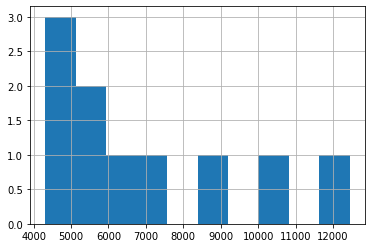

In [31]:
dfoscar.loc[idx, 'standardInChIKey'].value_counts().hist()

In [32]:
dfnms = pd.read_csv('data/gn_dataframe.tsv', sep='\t')
dfnms.head()

,doi,verbatim,odds,dataSourceId,taxonId,classificationPath,classificationRank,matchType
0,np960477h,Nuphar,852.070419,1.0,54956720,Plantae|Tracheophyta|Magnoliopsida|Nymphaeales...,kingdom|phylum|class|order|family|genus,ExactMatch
1,np960477h,Haplosclerid,488.154263,NaN,NaN,NaN,NaN,NoMatch
2,np50085a015,HIANS,611.963223,181.0,1124007,Biota|Animalia|Chordata|Vertebrata|Aves|Aves|A...,|Kingdom|phylum|subphylum|class|order|family|g...,ExactCanonicalMatch
3,np50085a015,Salvia hians,1117.437577,1.0,43131252,Plantae|Tracheophyta|Magnoliopsida|Lamiales|La...,kingdom|phylum|class|order|family|genus|species,ExactCanonicalMatch
4,np50085a015,Salvia hians,1117.437577,1.0,43131252,Plantae|Tracheophyta|Magnoliopsida|Lamiales|La...,kingdom|phylum|class|order|family|genus|species,ExactCanonicalMatch


In [33]:
dfnms.shape

(270318, 8)

In [34]:
# Total occurencies of taxon
dfnms.fillna('', inplace=True)
sum(dfnms['taxonId']=='')

70058

In [35]:
# Number of no matches
sum(dfnms['matchType']=='NoMatch')

70045

In [36]:
# Match types
dfnms['matchType'].unique()

array(['ExactMatch', 'NoMatch', 'ExactCanonicalMatch',
       'ExactPartialMatch', 'FuzzyCanonicalMatch', 'FuzzyPartialMatch'],
      dtype=object)

In [37]:
# Number dois present in the search
len(dfnms['doi'].unique())

14162

In [38]:
# Number of unique taxon
len(dfnms.loc[dfnms['matchType']!='NoMatch','taxonId'].unique())

25926

In [43]:
dfnms['classification'] = dfnms['classificationPath'].apply(lambda a: a.split('|')[-1])
dfnms['Rank'] = dfnms['classificationRank'].apply(lambda a: a.split('|')[-1])
dfnms[['classification', 'Rank']].head()

,classification,Rank
0,Nuphar,genus
1,,
2,Hians,genus
3,Salvia hians,species
4,Salvia hians,species


In [47]:
dfnms.loc[dfnms['Rank']=='species', 'classification'].value_counts().head()

Staphylococcus aureus     1878
Escherichia coli          1468
Candida albicans          1202
Bacillus subtilis          939
Pseudomonas aeruginosa     608
Name: classification, dtype: int64

In [51]:
name = dfnms.loc[dfnms['Rank']=='species', 'classification'].value_counts().head().index.tolist()
val = dfnms.loc[dfnms['Rank']=='species', 'classification'].value_counts().head().values.tolist()

val

[1878, 1468, 1202, 939, 608]

([<matplotlib.patches.Wedge at 0x7ff70a85eac8>,
 [Text(0.6236502664633018, 0.906123802325186, 'Staphylococcus aureus'),
  Text(-0.9909954665186228, 0.477418040442061, 'Escherichia coli'),
  Text(-0.6600200560344678, -0.8799849576170369, 'Candida albicans'),
  Text(0.48837070248182635, -0.9856439808355792, 'Bacillus subtilis'),
  Text(1.0464246843473533, -0.33910968725257923, 'Pseudomonas aeruginosa')])

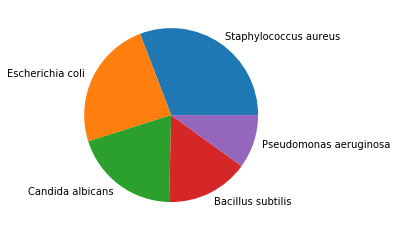

In [52]:
plt.pie(val, labels=name)

In [54]:
plt.pie(val, labels=name)
with PdfPages('pie_chart.pdf') as pdf:
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

In [55]:
dfimg = pd.read_csv('data/img_dataframe.tsv', sep='\t')
dfimg.head()

,doi,smiles,standardInChIKey,ExactMolWt,pubchem
0,np9600863,COC(C12C[C@@H](C(=C1C(OC(=O)c1ccccc1)*(C1([C](...,NaN,0.000000,NaN
1,np020261h,*[C@H]1CC[C@]2([C@H](C1)[C@@H](O)C[C@@H]1[C@@H...,NaN,396.266445,NaN
2,np960673o,CN1C=C(NC1NC1NC(=O)N(C1=O)C)Cc1ccc2c(c1)OCO2,NNNDHHGBLRKSDP-UHFFFAOYSA-N,345.143704,NaN
3,np960673o,COc1ccc(cc1)Cc1nc(n(c1Cc1ccc(c(c1*)C)O)C)/N=C/...,NaN,446.182829,NaN
4,np960673o,C/N=C/1\N=C(C(=O)*1)/*=c/1\[nH]c(c(n1C)Cc1ccc(...,NaN,0.000000,NaN


In [20]:
# Number of InChIKey
dfimg.fillna('', inplace=True)
sum(dfimg['standardInChIKey']!='')

26181

In [21]:
# Number of unique InChIKey
len(dfimg.loc[dfimg['standardInChIKey']!='', 'standardInChIKey'].unique())

22437

In [22]:
# Number of dois represented
len(dfimg.loc[dfimg['standardInChIKey']!='', 'doi'].unique())

5618